In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import keras

2023-11-06 13:51:39.499159: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 13:51:39.819315: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 13:51:39.821095: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 13:51:41.247192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
with open('./datasets-2019/IGO/IPCC-2019-1.txt', 'r') as file:
    contents = file.read()

# Print the contents
#print(contents)

In [3]:
with open('./datasets-2019/IGO/IPCC-2019-2.txt', 'r') as file:
    contents2 = file.read()

# Print the contents
#print(contents2)

In [4]:
with open('./datasets-2019/IGO/IPCC-2019.txt', 'r') as file:
    contents3 = file.read()

# Print the contents
#print(contents3)

In [5]:
with open('./datasets-2019/IGO/UNEP-2019-2.txt', 'r') as file:
    contents4 = file.read()

# Print the contents
#print(contents4)

In [6]:
IGO = contents + contents2 + contents3 + contents4


In [20]:
print(IGO)

 G.1
GLOSSARY
Glossary
G.2 2019 Refinement to the 2006 IPCC Guidelines for National Greenhouse Gas Inventories
Accuracy
A relative measure of the exactness of an emission or removal estimate. Estimates should be accurate in the sense that they are systematically neither over nor under true emissions or removals, so far as can be judged.
Activity
A practice or ensemble of practices that take place on a delineated area over a given period of time.
Activity data
Data on the magnitude of a human activity resulting in emissions or removals taking place during a given period of time. Data on energy use, metal production, land areas, management systems, lime and fertilizer use and waste arisings are examples of activity data.
Agricultural pond
An artificial storage containing water for agricultural (irrigation) or pastoral (stock watering) uses. They are typically unlined and constructed using a combination of earthen embankments and the natural topography on the landscape. They can range in 

In [7]:
#with open('./datasets-2019/NGO/FoE-2019-7.txt', 'r') as file:
#    ngo = file.read()
with open('./datasets-2019/NGO/WWF-2019-41.txt', 'r') as file:
    ngo2 = file.read()
with open('./datasets-2019/NGO/WWF-2019-42.txt', 'r') as file:
    ngo3 = file.read()

NGO = ngo2 + ngo3

In [22]:
print(NGO)

VISIONING
FUTURES
Improving infrastructure
planning to harness nature’s
benefits in a warming world



DECEMBER 2019
                                                                                         TABLE OF CONTENTS
                                                                                         EXECUTIVE SUMMARY	                                         3
                                                                                         PART 1: DEFINING THE CHALLENGE	                        9
                                                                                         	 THE PROBLEM	                                        10
                                                                                         	 WORKING TOWARD A SOLUTION: TRENDS IN SUSTAINABLE, 		
    AUTHOR                                                                                   CLIMATE-RESILIENT INFRASTRUCTURE	                 13
    Ryan Bartlett                           

## News

In [23]:
df = pd.read_csv('./datasets-2019/news/merged_data.csv')

In [24]:
df

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet
0,https://archive.org/details/FOXNEWSW_20190519_...,5/19/2019 15:59:08,FOXNEWS,MediaBuzz,FOXNEWSW_20190519_150000_MediaBuzz,https://archive.org/download/FOXNEWSW_20190519...,"left-leaning british newspaper, is changing it..."
1,https://archive.org/details/FOXNEWSW_20190518_...,5/18/2019 4:30:00,FOXNEWS,Tucker Carlson Tonight,FOXNEWSW_20190518_040000_Tucker_Carlson_Tonight,https://archive.org/download/FOXNEWSW_20190518...,memorable segments this show has ever run. we ...
2,https://archive.org/details/FOXNEWSW_20190509_...,5/9/2019 21:40:16,FOXNEWS,The Five,FOXNEWSW_20190509_210000_The_Five,https://archive.org/download/FOXNEWSW_20190509...,on the ground. sometimes it's a muslim terrori...
3,https://archive.org/details/FOXNEWSW_20190506_...,5/6/2019 15:26:00,FOXNEWS,Americas Newsroom With Bill Hemmer and Sandra ...,FOXNEWSW_20190506_130000_Americas_Newsroom_Wit...,https://archive.org/download/FOXNEWSW_20190506...,painting a dire picture of our future blaming ...
4,https://archive.org/details/FOXNEWSW_20190527_...,5/27/2019 2:10:30,FOXNEWS,Hannity Special,FOXNEWSW_20190527_020000_Hannity_Special,https://archive.org/download/FOXNEWSW_20190527...,conspiracy channel like roswell new mexico eve...
...,...,...,...,...,...,...,...
27629,https://archive.org/details/FOXNEWSW_20190906_...,9/6/2019 6:15:21,FOXNEWS,The Ingraham Angle,FOXNEWSW_20190906_060000_The_Ingraham_Angle,https://archive.org/download/FOXNEWSW_20190906...,that they have to transition to a different ty...
27630,https://archive.org/details/FOXNEWSW_20190906_...,9/6/2019 5:06:40,FOXNEWS,Hannity,FOXNEWSW_20190906_050000_Hannity,https://archive.org/download/FOXNEWSW_20190906...,"climate change. at cnn, the network provided t..."
27631,https://archive.org/details/FOXNEWSW_20190911_...,9/11/2019 13:59:49,FOXNEWS,Americas Newsroom With Bill Hemmer and Sandra ...,FOXNEWSW_20190911_130000_Americas_Newsroom_Wit...,https://archive.org/download/FOXNEWSW_20190911...,"job creation, we also want to talk about clima..."
27632,https://archive.org/details/FOXNEWSW_20190924_...,9/24/2019 6:33:08,FOXNEWS,The Ingraham Angle,FOXNEWSW_20190924_060000_The_Ingraham_Angle,https://archive.org/download/FOXNEWSW_20190924...,pointer for a cat and everyone goes climate ch...


In [9]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package stopwords to /home/kakas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df['Snippet'] = df['Snippet'].apply(preprocess_text)

In [28]:
NEWS = " ".join(snippet for snippet in df['Snippet'])

In [29]:
df['Snippet']

0        leftleaning british newspaper changing languag...
1        memorable segments show ever run debated engin...
2        ground sometimes muslim terrorist say gun cont...
3        painting dire picture future blaming man kinds...
4        conspiracy channel like roswell new mexico eve...
                               ...                        
27629    transition different type economy make palatab...
27630    climate change cnn network provided ten democr...
27631    job creation also want talk climate change thi...
27632    pointer cat everyone goes climate change dont ...
27633    terrifying hear responsible adults saying goin...
Name: Snippet, Length: 27634, dtype: object

In [30]:
wordcloudNews = WordCloud(width=1000, height=800, background_color="white", colormap='viridis').generate(NEWS)

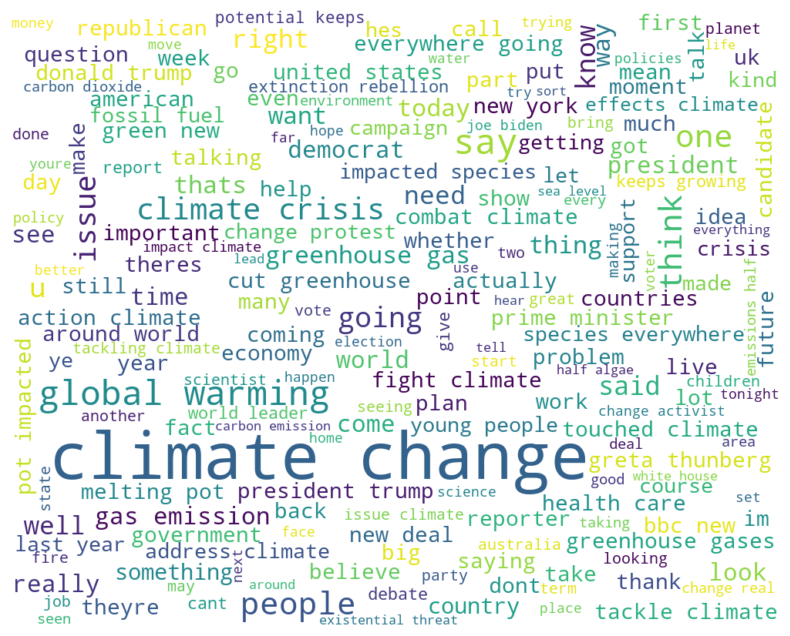

In [31]:
plt.figure(figsize=(20, 8))
plt.imshow(wordcloudNews, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
nltk.download('punkt')

tokens = word_tokenize(NEWS)

# Filter out stop words
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Calculate word frequencies for the filtered tokens
freq_dist = FreqDist(filtered_tokens)

# Select the most common words (e.g., top 20)
top_wordsNEWS = freq_dist.most_common(20)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jules\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


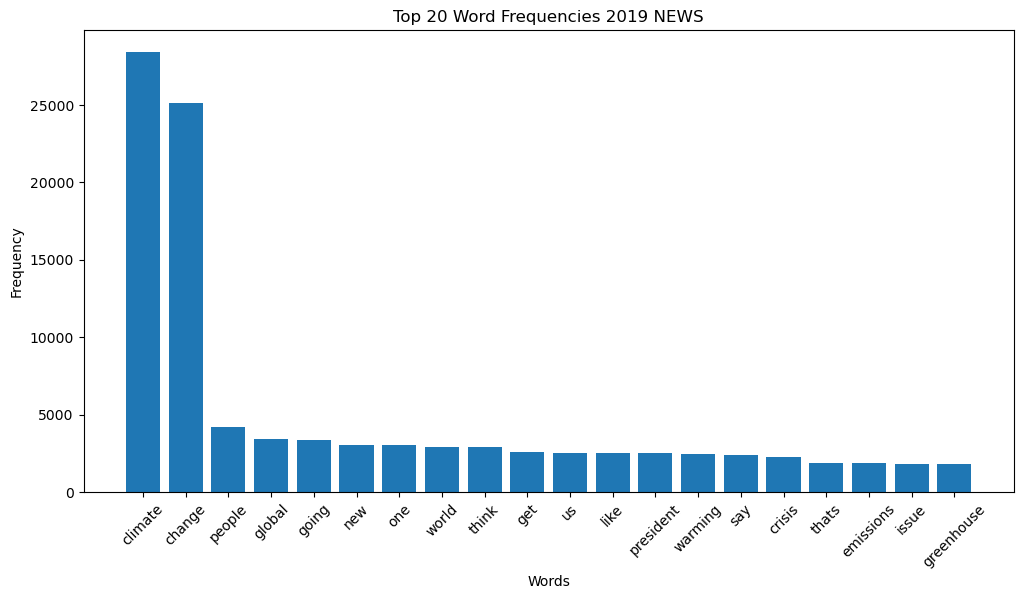

In [36]:
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in top_wordsNEWS], [word[1] for word in top_wordsNEWS])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Word Frequencies 2019 NEWS")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

## NGO

In [10]:
NGO = preprocess_text(NGO)

In [38]:
wordcloudNGO = WordCloud(width=1000, height=800, background_color="white", colormap='viridis').generate(NGO)

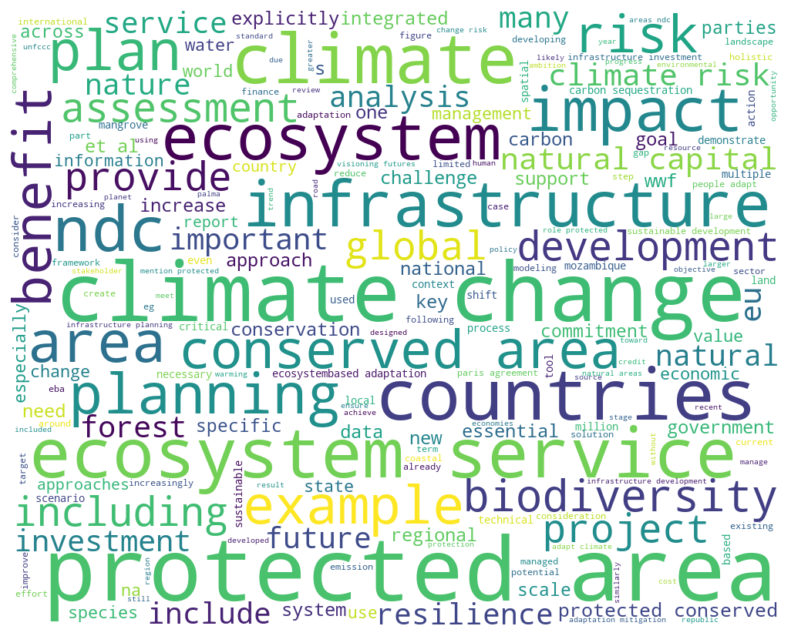

In [39]:
plt.figure(figsize=(20, 8))
plt.imshow(wordcloudNGO, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
tokens = word_tokenize(NGO)

# Filter out stop words
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Calculate word frequencies for the filtered tokens
freq_dist = FreqDist(filtered_tokens)

# Select the most common words (e.g., top 20)
top_wordsNGO = freq_dist.most_common(20)

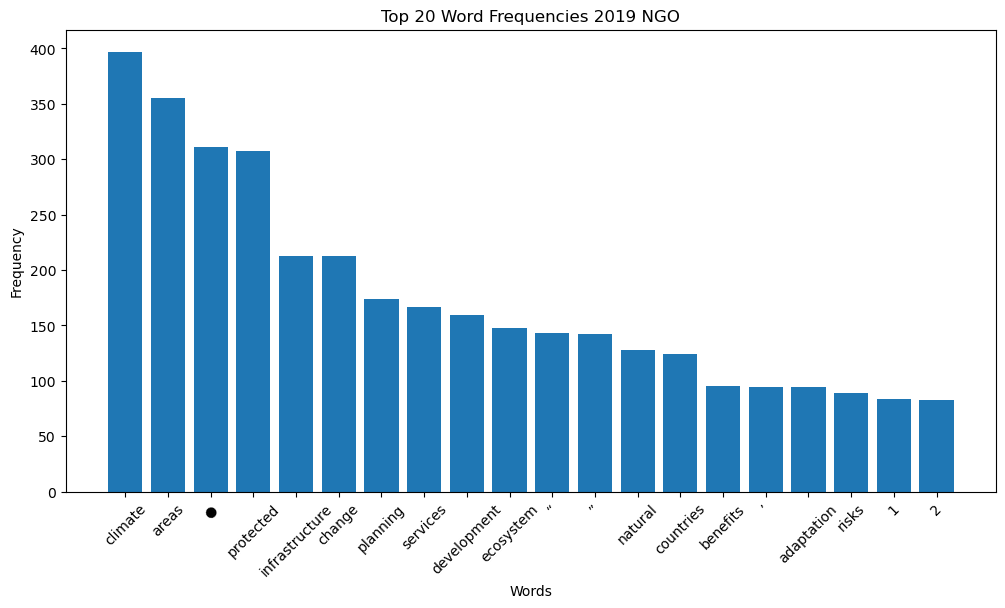

In [41]:
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in top_wordsNGO], [word[1] for word in top_wordsNGO])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Word Frequencies 2019 NGO")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

## IGO

In [12]:
IGO = preprocess_text(IGO)

In [43]:
wordcloudIGO = WordCloud(width=1000, height=800, background_color="white", colormap='viridis').generate(IGO)

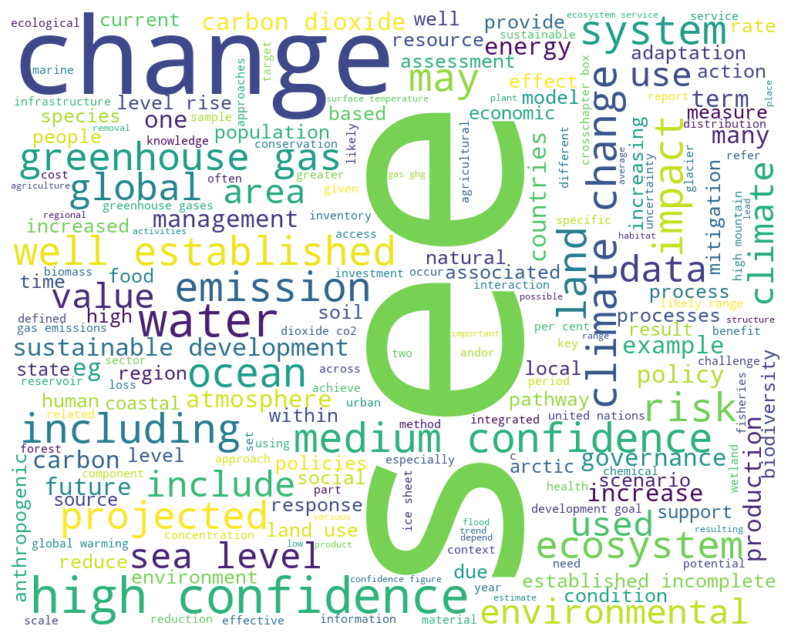

In [44]:
plt.figure(figsize=(20, 8))
plt.imshow(wordcloudIGO, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
tokens = word_tokenize(IGO)

# Filter out stop words
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Calculate word frequencies for the filtered tokens
freq_dist = FreqDist(filtered_tokens)

# Select the most common words (e.g., top 20)
top_wordsIGO = freq_dist.most_common(20)

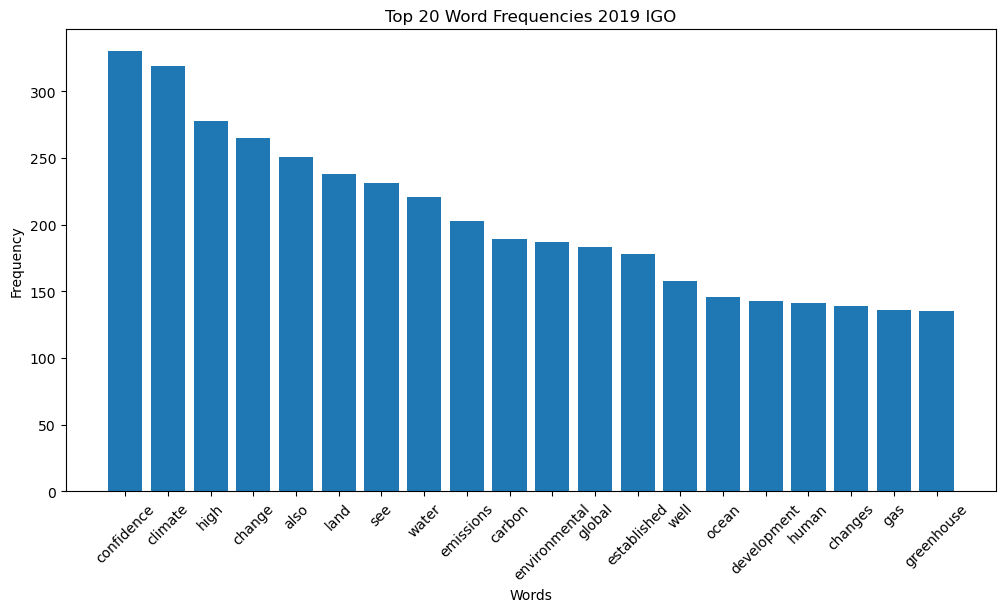

In [46]:
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in top_wordsIGO], [word[1] for word in top_wordsIGO])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Word Frequencies 2019 IGO")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

## Sentiment

# * JULES

In [15]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline


In [16]:
model_name = "SamLowe/roberta-base-go_emotions"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a text classification pipeline
emotion_classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [22]:
with open('./datasets-2019/NGO/WWF-2019-41.txt', 'r') as file:
    ngo2 = file.read()
with open('./datasets-2019/NGO/WWF-2019-42.txt', 'r') as file:
    ngo3 = file.read()

NGO = ngo2 + ngo3

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/kakas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk.tokenize import sent_tokenize

In [24]:
sentences = sent_tokenize(NGO)
print(sentences)

['VISIONING\nFUTURES\nImproving infrastructure\nplanning to harness nature’s\nbenefits in a warming world\n\n\n\nDECEMBER 2019\n                                                                                         TABLE OF CONTENTS\n                                                                                         EXECUTIVE SUMMARY\t                                         3\n                                                                                         PART 1: DEFINING THE CHALLENGE\t                        9\n                                                                                         \t THE PROBLEM\t                                        10\n                                                                                         \t WORKING TOWARD A SOLUTION: TRENDS IN SUSTAINABLE, \t\t\n    AUTHOR                                                                                   CLIMATE-RESILIENT INFRASTRUCTURE\t                 13\n    Ryan Bartlett  

In [25]:
import numpy as np

sentences_array = np.array([sentence.strip() for sentence in ' '.join(sentences).split('\n') for sentence in sentence.split('\t')])
print(sentences_array)
print(len(sentences_array))


['VISIONING' 'FUTURES' 'Improving infrastructure' ...
 'Washington, DC 20037' '' 'worldwildlife.org']
3048


In [26]:
for sentence in sentences_array:
    print(emotion_classifier(sentence))

[{'label': 'neutral', 'score': 0.9573751091957092}]
[{'label': 'neutral', 'score': 0.9691014289855957}]
[{'label': 'neutral', 'score': 0.9171009659767151}]
[{'label': 'neutral', 'score': 0.8559622168540955}]
[{'label': 'approval', 'score': 0.49593761563301086}]
[{'label': 'neutral', 'score': 0.9549601674079895}]
[{'label': 'neutral', 'score': 0.9549601674079895}]
[{'label': 'neutral', 'score': 0.9549601674079895}]
[{'label': 'neutral', 'score': 0.8240894675254822}]
[{'label': 'neutral', 'score': 0.9654900431632996}]
[{'label': 'admiration', 'score': 0.7058406472206116}]
[{'label': 'neutral', 'score': 0.9637157917022705}]
[{'label': 'neutral', 'score': 0.9619619250297546}]
[{'label': 'neutral', 'score': 0.9510102272033691}]
[{'label': 'neutral', 'score': 0.9549601674079895}]
[{'label': 'neutral', 'score': 0.9309763312339783}]
[{'label': 'neutral', 'score': 0.9638518691062927}]
[{'label': 'neutral', 'score': 0.9549601674079895}]
[{'label': 'neutral', 'score': 0.941490650177002}]
[{'label

KeyboardInterrupt: 

In [27]:
with open('./datasets-2019/IGO/IPCC-2019-1.txt', 'r') as file:
    contents = file.read()

with open('./datasets-2019/IGO/IPCC-2019-2.txt', 'r') as file:
    contents2 = file.read()

with open('./datasets-2019/IGO/IPCC-2019.txt', 'r') as file:
    contents3 = file.read()
with open('./datasets-2019/IGO/UNEP-2019-2.txt', 'r') as file:
    contents4 = file.read()
IGO = contents + contents2 + contents3 + contents4


In [29]:
sentencesIGO = sent_tokenize(IGO)
print(sentencesIGO)

[' G.1\nGLOSSARY\nGlossary\nG.2 2019 Refinement to the 2006 IPCC Guidelines for National Greenhouse Gas Inventories\nAccuracy\nA relative measure of the exactness of an emission or removal estimate.', 'Estimates should be accurate in the sense that they are systematically neither over nor under true emissions or removals, so far as can be judged.', 'Activity\nA practice or ensemble of practices that take place on a delineated area over a given period of time.', 'Activity data\nData on the magnitude of a human activity resulting in emissions or removals taking place during a given period of time.', 'Data on energy use, metal production, land areas, management systems, lime and fertilizer use and waste arisings are examples of activity data.', 'Agricultural pond\nAn artificial storage containing water for agricultural (irrigation) or pastoral (stock watering) uses.', 'They are typically unlined and constructed using a combination of earthen embankments and the natural topography on the l

In [30]:
sentences_arrayIGO = np.array([sentence.strip() for sentence in ' '.join(sentencesIGO).split('\n') for sentence in sentence.split('\t')])
print(sentences_arrayIGO)
print(len(sentences_arrayIGO))


['G.1' 'GLOSSARY' 'Glossary' ...
 'International cooperation and sharing of data and information resulting from observational networks on Earth and in space are key to success (well established). Continued Investment in education and training of the next generation of experts and decision-makers Is essential for maintaining the pace of progress on the multigenerational challenges associated with the "Healthy Planet, Healthy People" theme of GEO-6. {25.3}'
 '5.3 The way forward'
 'The sixth Global Environmental Outlook has set out many of the challenges and opportunities faced by the world today, moving forward from today to 2030 and beyond that to 2050. The ongoing revolution In data and knowledge of all types at the local, national and multinational levels offers an opportunity to Increase our capacity to address environmental and governance challenges and accelerate progress. Most Important Is the need to take bold, urgent, sustainable and inclusive action that Integrates environment

In [31]:
for sentence in sentences_arrayIGO:
    print(emotion_classifier(sentence))

[{'label': 'neutral', 'score': 0.967589795589447}]
[{'label': 'neutral', 'score': 0.9622361063957214}]
[{'label': 'neutral', 'score': 0.9645338654518127}]
[{'label': 'neutral', 'score': 0.9547839760780334}]
[{'label': 'neutral', 'score': 0.3211362361907959}]
[{'label': 'neutral', 'score': 0.8814672231674194}]
[{'label': 'neutral', 'score': 0.9647425413131714}]
[{'label': 'neutral', 'score': 0.9643886089324951}]
[{'label': 'neutral', 'score': 0.913823664188385}]
[{'label': 'neutral', 'score': 0.9674465656280518}]
[{'label': 'neutral', 'score': 0.9138597846031189}]
[{'label': 'neutral', 'score': 0.901114284992218}]


KeyboardInterrupt: 

# * JULES

In [56]:
df['Snippet']

0        leftleaning british newspaper changing languag...
1        memorable segments show ever run debated engin...
2        ground sometimes muslim terrorist say gun cont...
3        painting dire picture future blaming man kinds...
4        conspiracy channel like roswell new mexico eve...
                               ...                        
27629    transition different type economy make palatab...
27630    climate change cnn network provided ten democr...
27631    job creation also want talk climate change thi...
27632    pointer cat everyone goes climate change dont ...
27633    terrifying hear responsible adults saying goin...
Name: Snippet, Length: 27634, dtype: object

In [59]:
# Tried multiprocessing on cpu, took 5 hours with 24 threads - NOT RECOMMENDED
# from tqdm.notebook import tqdm
# from joblib import Parallel, delayed

# def classify_emotion(snippet):
#     result = emotion_classifier(snippet)
#     return result.pop()['label']

# sentiments = Parallel(n_jobs=-1, verbose=10)(delayed(classify_emotion)(snippet) for snippet in tqdm(df['Snippet'], desc="Classifying"))

# df['Sentiment'] = sentiments

Classifying:   0%|          | 0/27634 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  

KeyboardInterrupt: 

In [67]:
# Make sure torch is installed. by running the following command in your terminal:
# pip install torch torchvision torchaudio

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm.notebook import tqdm

# Ensure CUDA (GPU support) is available and enabled.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the tokenizer and model.
model_name = "SamLowe/roberta-base-go_emotions"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

# Model evaluation mode, dropout layers are disabled. Used when making predictions and using the pretrained model.
# Pytorch assumes the model is in training mode by default.
# model.eval()

def classify_emotion(snippets):
    # Tokenize the batch of snippets.
    inputs = tokenizer(snippets, return_tensors="pt", padding=True, truncation=True).to(device)
    
    # Make predictions.
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get the predicted class index.
    predictions = torch.argmax(outputs.logits, dim=-1)
    return predictions.cpu().numpy()

# Process the snippets in batches.
batch_size = 16 
sentiments = []

for i in tqdm(range(0, len(df['Snippet']), batch_size), desc="Classifying"):
    batch_snippets = df['Snippet'][i:i + batch_size].tolist()
    batch_predictions = classify_emotion(batch_snippets)
    sentiments.extend(batch_predictions)

# Assign the predictions to the DataFrame.
df['Sentiment'] = sentiments


Classifying:   0%|          | 0/1728 [00:00<?, ?it/s]

In [68]:
# df to csv
# df.to_csv('sentiment.csv')

In [69]:
# df to csv
df.to_csv('sentiment-without-eval.csv')